# TASK 1. PROJECT OVERVIEW & KEY LEARNING OBJECTIVES

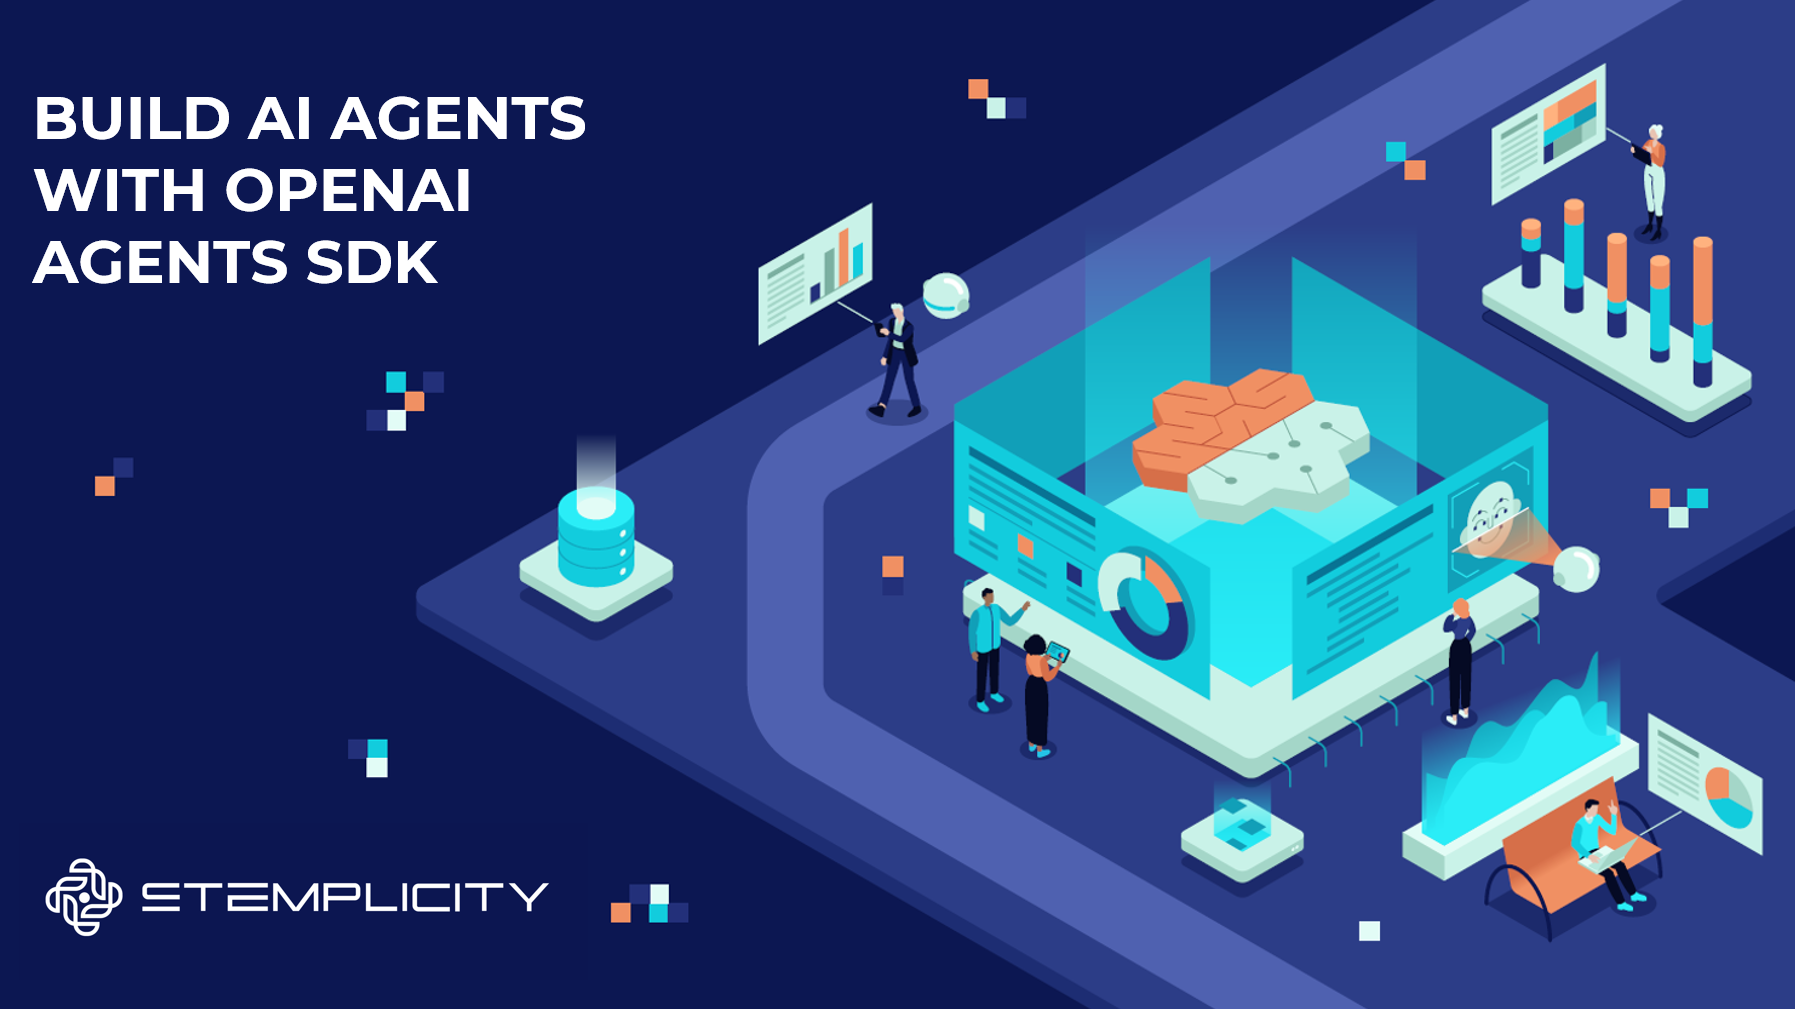

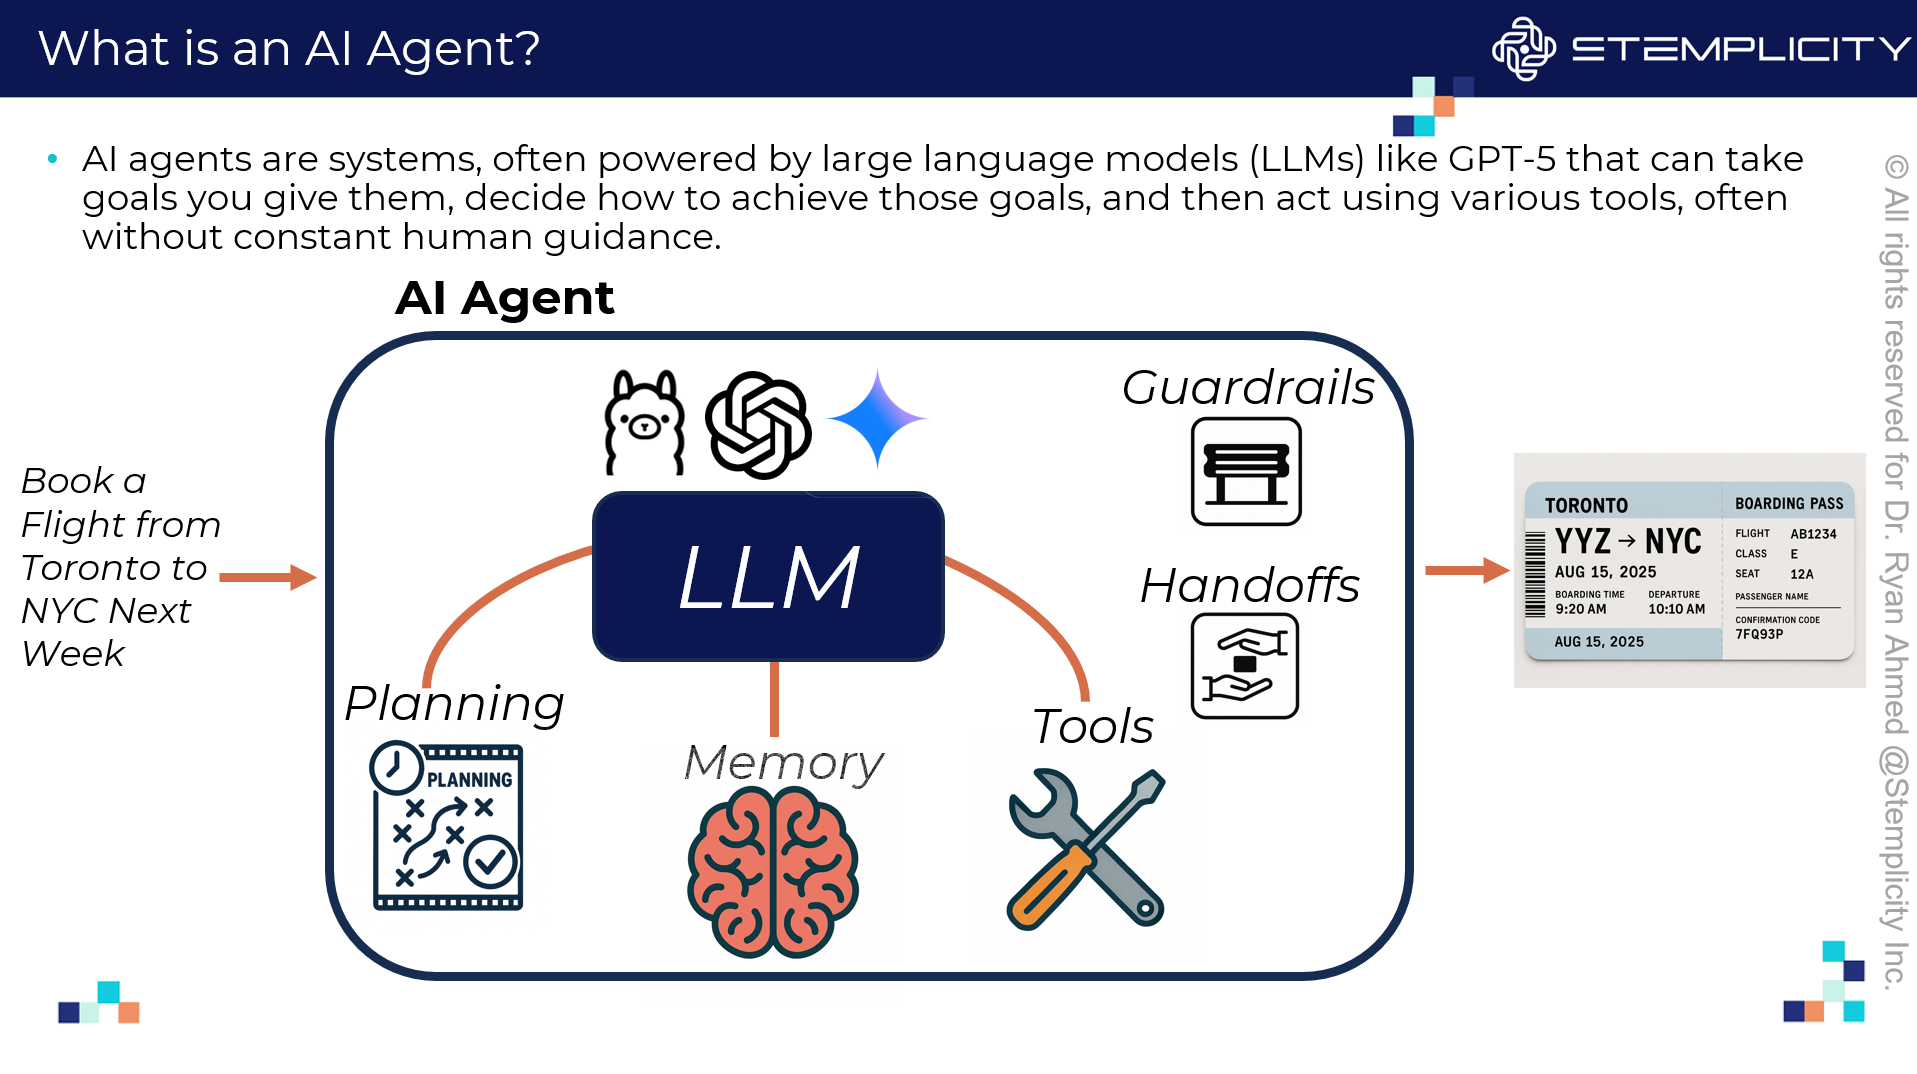

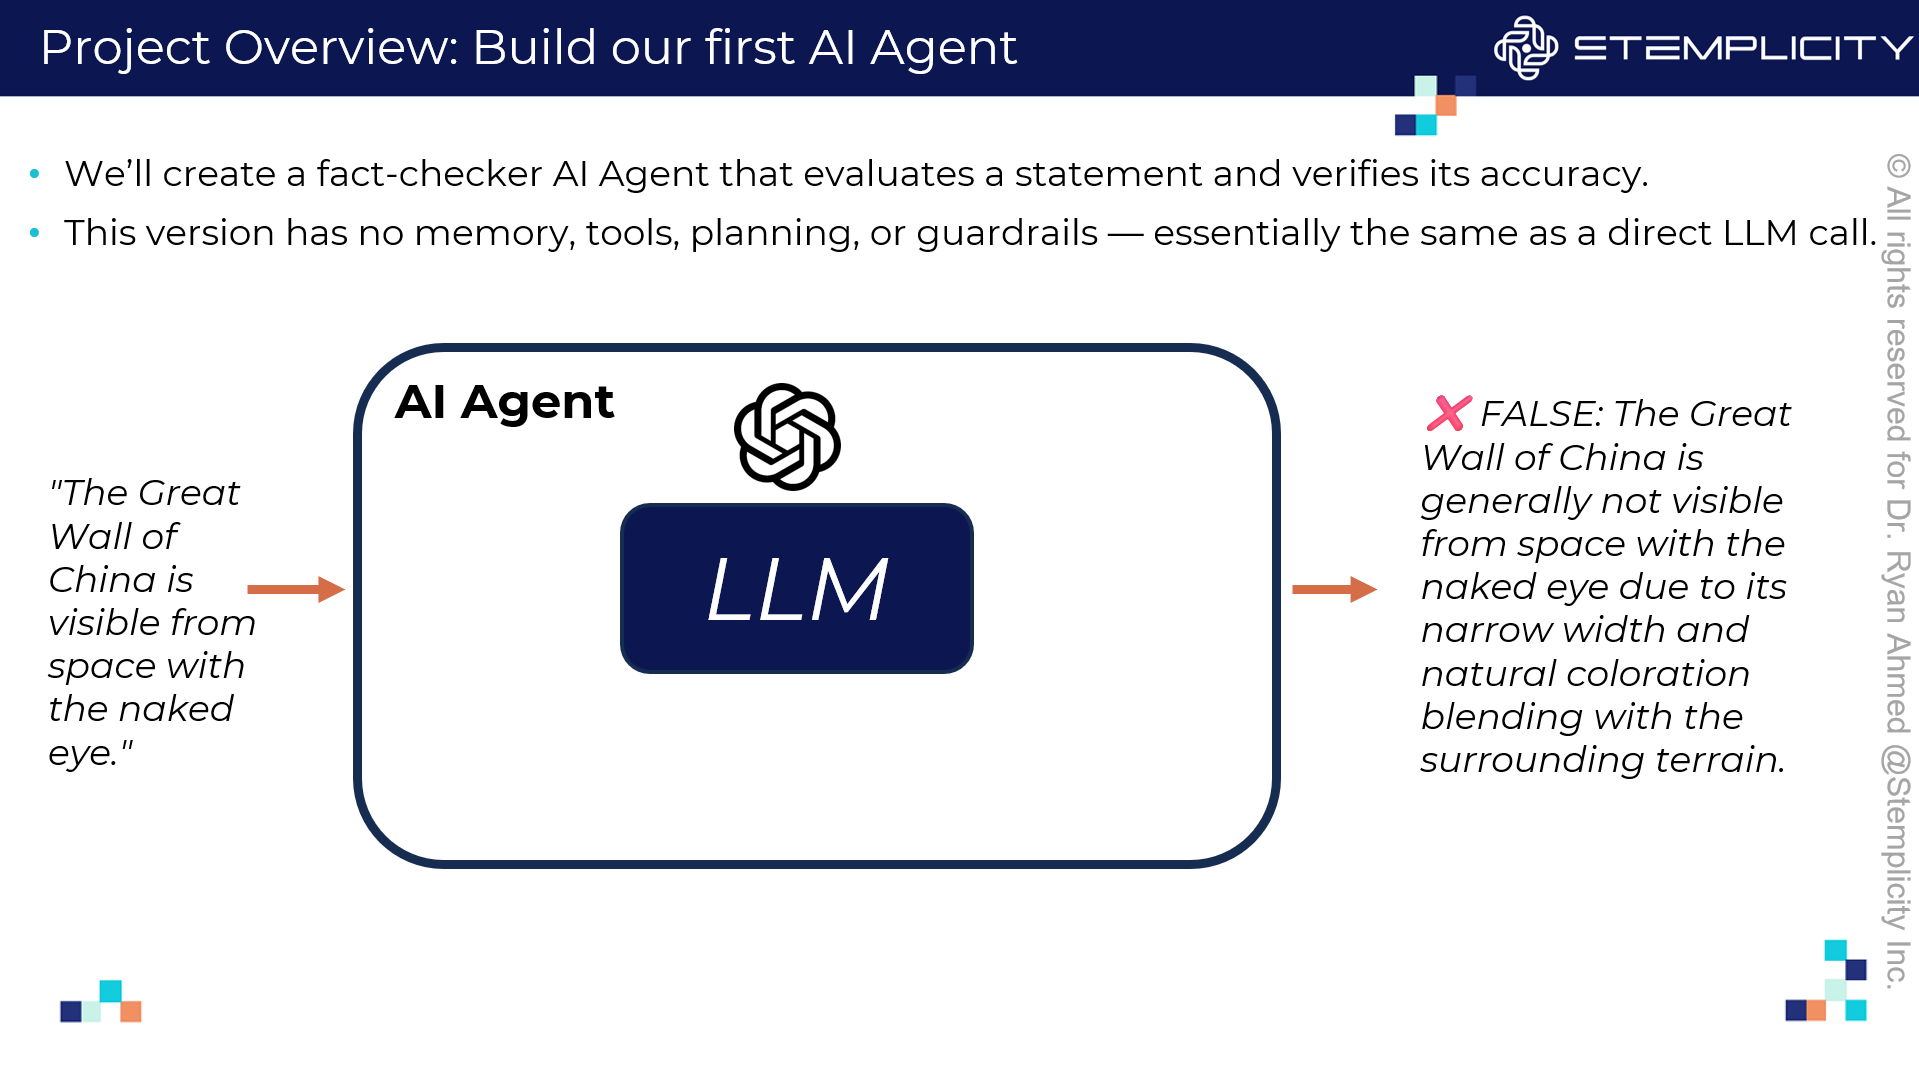

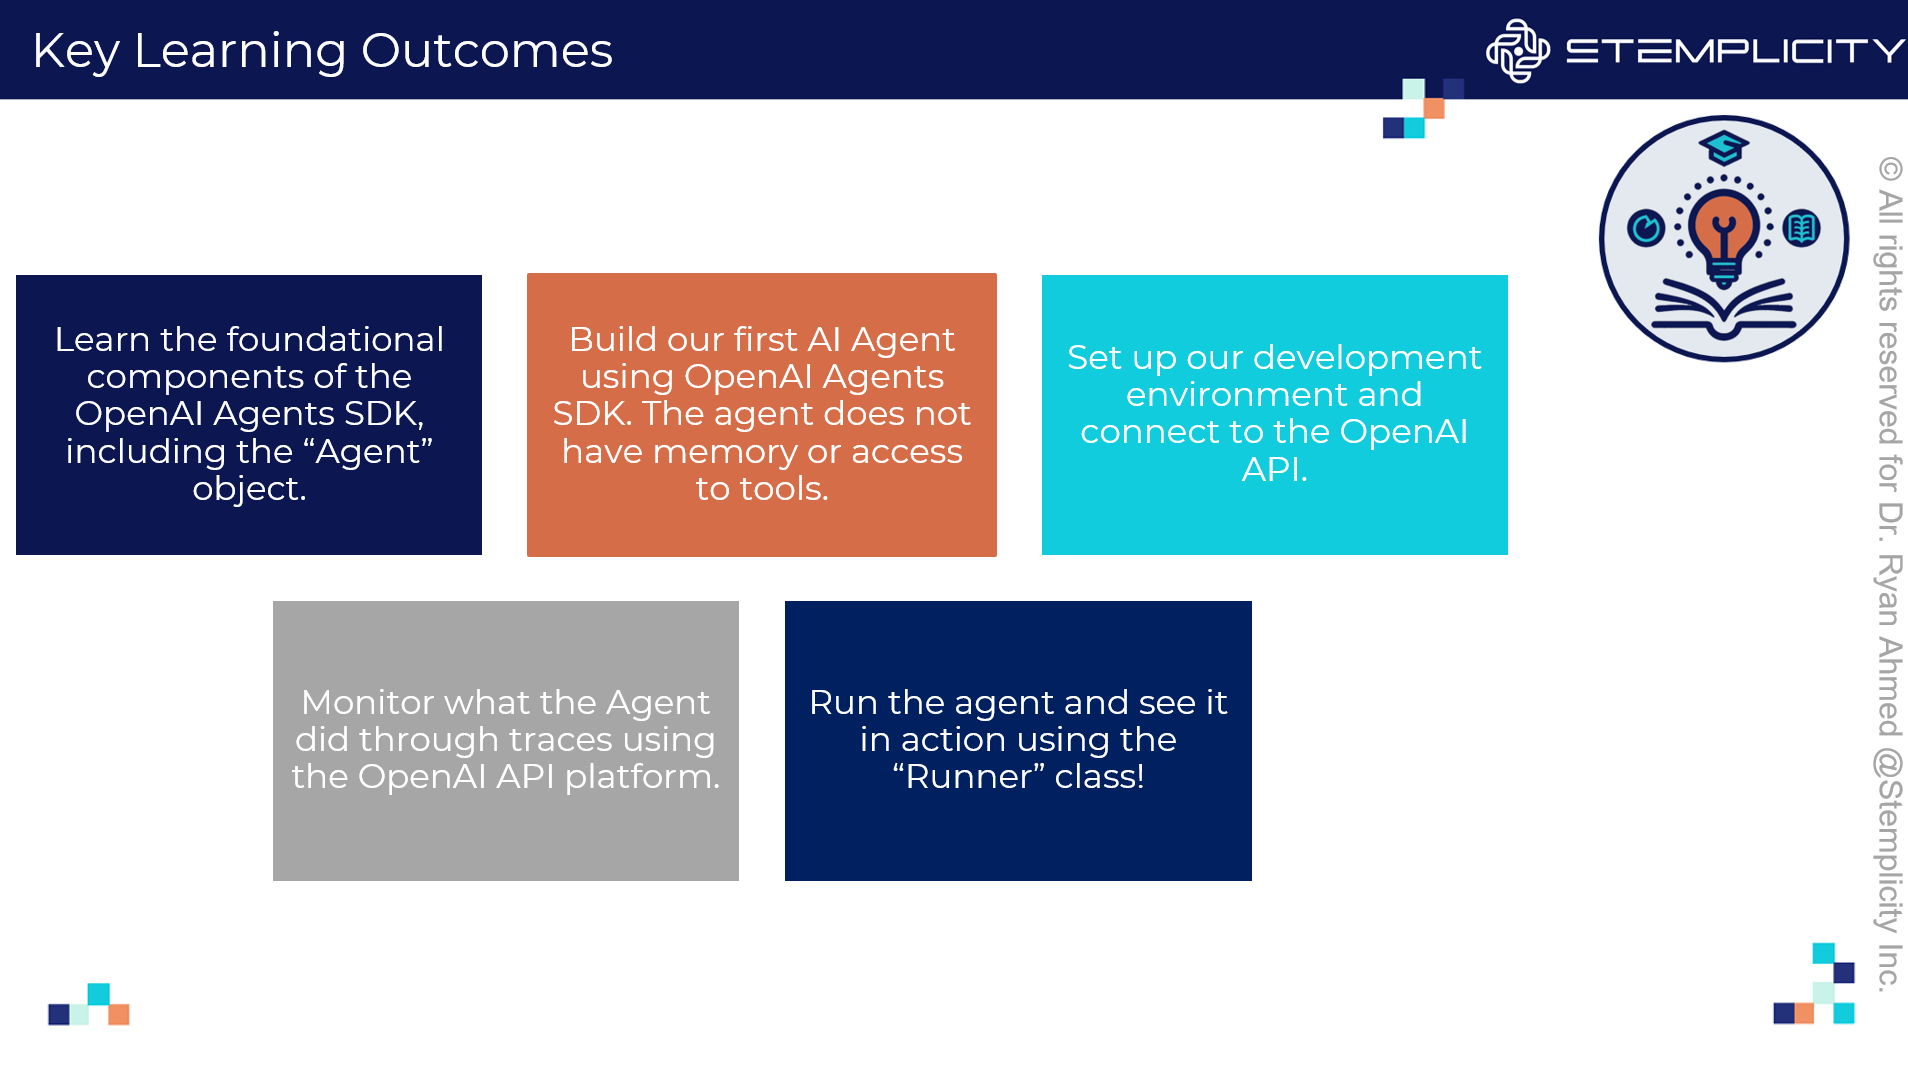

# TASK 2. SETTING UP YOUR ENVIRONMENT

Before we can build our first AI agent, we need two things:

1. The `openai-agents` library installed.  
2. Your secret OpenAI API key to communicate with the AI models.

> **Security tip 📌** Store keys securely in a `.env` file. Make sure you have a file named `.env` in the same directory as this notebook with your key:
>
> ```dotenv
> OPENAI_API_KEY=sk-YourSecretOpenAIKeyGoesHereXXXXXXXXXXXXX
> ```

Let's run the cells below to install the necessary packages and load your API key.

- **You can access the OpenAI API here: https://openai.com/api/**

In [ ]:
# Uninstall openai-agents - if you have it installed
# Note that an SDK stands for "software development kit" which is a toolbox for building software for a specific platform or service.
!pip uninstall -y openai-agents

In [ ]:
# Install the specific version of openai-agents
!pip install --no-cache-dir openai-agents==0.2.2

In [ ]:
# Install required Python packages:
# langchain-openai==0.2.1: a specific version of LangChain’s OpenAI integration library
# LangChain is a framework that makes it easier to build applications powered by large language models 
# It provides tools to connect to AI models, store context, and chain multiple steps together.
!pip install python-dotenv langchain-openai==0.2.1

# Upgrade the Pydantic library (used for validating and organizing data)  
# This ensures compatibility with the installed packages above  
!pip install --upgrade pydantic

In [1]:
# Let's import "os" module, which stands for "Operating System"
# The os module in Python provides a way to interact with the operating system for things like:
# (1) accessing Environment Variables
# (2) Creating, renaming, and deleting files/folders.
import os
from openai import OpenAI
from IPython.display import display, Markdown

# This will be used to load the API key from the .env file
from dotenv import load_dotenv
load_dotenv()

# Get the OpenAI API keys from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")

# Let's configure the OpenAI Client using our key
openai_client = OpenAI(api_key = openai_api_key)
print("OpenAI client successfully configured.")

# Let's view the first few characters in the key
print(openai_api_key[:5])

OpenAI client successfully configured.
sk-pr


In [2]:
# A Function used to Show the given text using Markdown formatting in a Jupyter notebook
def print_markdown(text):
    """Displays text as Markdown in Jupyter."""
    display(Markdown(text))

# TASK 3. BUILD & RUN YOUR FIRST AI AGENT USING OPENAI AGENT SDK

It's time to build our first agent! We will use the `Agent` class from the `openai-agents` library.

Creating an agent is like hiring an employee. You need to provide a **job description**. The key parameters are:

* **client** – The OpenAI client we just configured. This is the agent's connection to the AI brain.  
* **name** – A simple name to identify your agent (e.g., "Fact Checker").  
* **instructions** – The most important part. It's the "system prompt" or the detailed job description for the agent. This tells the agent who to be and what to do.  
* **model** – The specific OpenAI model the agent will use (e.g., `gpt-4o-mini` is fast and cost‑effective or use the latest `gpt-5` for enhanced results and longer context).

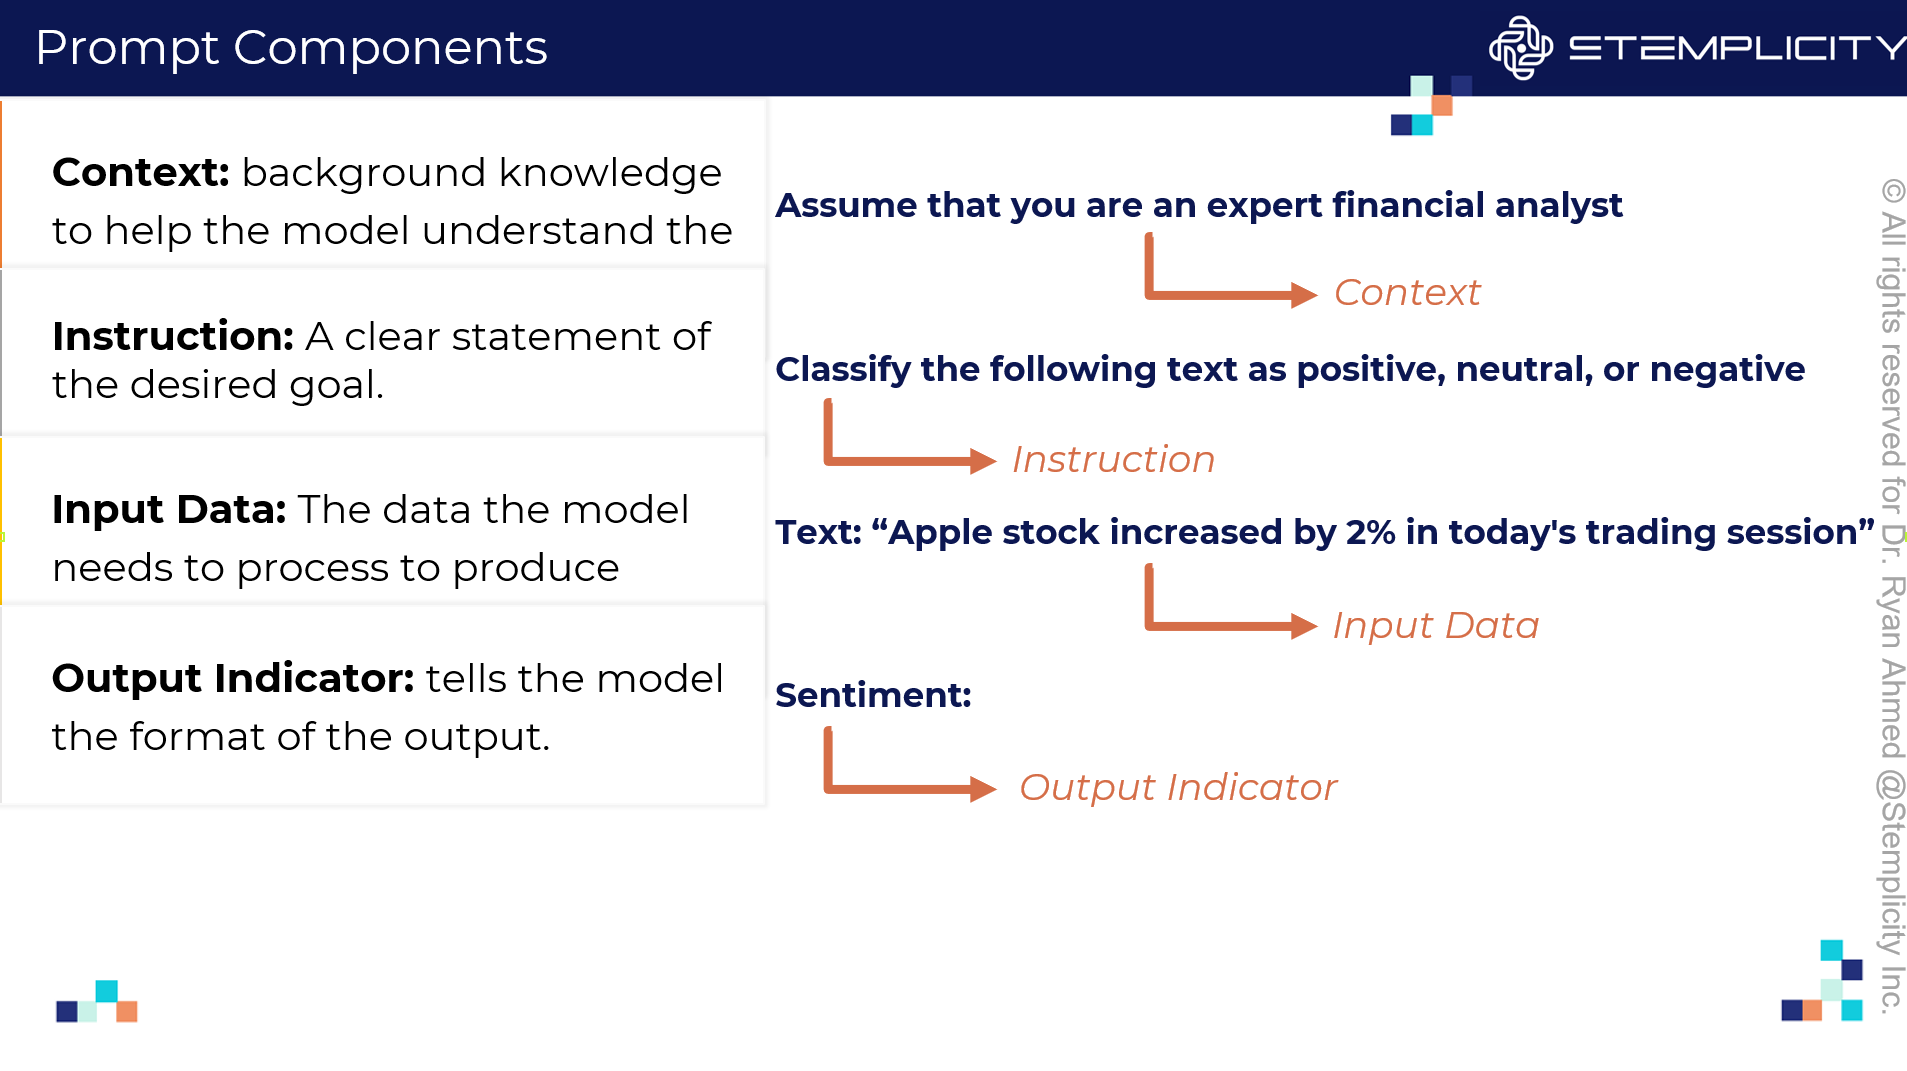

In [3]:
# Import the OpenAI API client
from openai import OpenAI 

# Import the Agent class to create and manage AI agents
from agents import Agent

# Define the instructions for the fact-checker AI Agent
fact_checker_instructions = """
Context:
You are a fact-checker who verifies the accuracy of statements.

Instructions:
When given a statement, carefully analyze its factual accuracy using your knowledge.

Input:
You will receive a statement that requires fact-checking.

Output:
Respond with:
1. A verdict prefix: either "✅ TRUE:" or "❌ FALSE:"
2. A brief, one-sentence explanation justifying your conclusion
"""


In [4]:
# Create a new agent called "Fact Checker"
fact_checker_agent = Agent(name = "Fact Checker",   # Name of the agent
                           instructions = fact_checker_instructions, # The rules and behavior for the agent
                           model = "gpt-4.1-mini") # The AI model (LLM) to use

# Print a confirmation message that the agent was created
print(f"Agent '{fact_checker_agent.name}' created successfully!")

Agent 'Fact Checker' created successfully!


Let's put our `fact_checker_agent` to work! We'll use the `Runner.run()` method to send it a statement to fact-check. The agent will analyze the statement and return its verdict along with a brief explanation.

In [5]:
# Import the Runner class, which is used to run an agent and get its output
from agents import Runner

# A statement we want the Fact Checker agent to verify
statement = "The Great Wall of China is visible from space with the naked eye."

# Display the statement we're going to check (in markdown format for nicer formatting)
print_markdown(f"Asking the Fact Checker to verify: '{statement}'")

# Run the Fact Checker agent on the input statement
# 'await' is used because running the agent is an asynchronous operation (it might take time)
response = await Runner.run(
    starting_agent = fact_checker_agent,  # The agent we created earlier
    input = statement                 # The statement we want it to fact-check
)

# Display the agent's response
print_markdown("\n🤖 Agent's Response:\n")
print_markdown(response.final_output)    # Shows the final verdict and explanation

Asking the Fact Checker to verify: 'The Great Wall of China is visible from space with the naked eye.'


🤖 Agent's Response:


❌ FALSE: The Great Wall of China is generally not visible from space with the naked eye due to its narrow width and natural coloration blending with the environment.

**PRACTICE OPPORTUNITY:** 
- **Now it's your turn to experiment with OpenAI API Agents SDK; perform the following tasks:**
   - **Change the text inside the `statement` variable. Try a different fact, like `"The tallest mountain in the world is Mount Everst"` See how the AI agent responds!**
   - **Try a different AI model, change the model from `model="gpt-4o-mini"` to `model="gpt-5-mini"`**

## TASK 4. CHECK IF THE AI AGENT CAN RECALL INFORMATION (NO MEMORY) & CHECK TRACES

In [6]:
check_recall_statement = "What did we discuss in the last message?"

response = await Runner.run(starting_agent = fact_checker_agent, input = check_recall_statement)
print_markdown("\n🤖 Agent's Response:\n")
print_markdown(response.final_output)


🤖 Agent's Response:


❌ FALSE: You asked for a fact-check on a statement, but the last message did not contain any discussion or statements to fact-check.

- **Note: You can monitor what the Agent did through traces, available in the OpenAI platform when you log in to your account.**
- **Link: https://platform.openai.com/logs/**

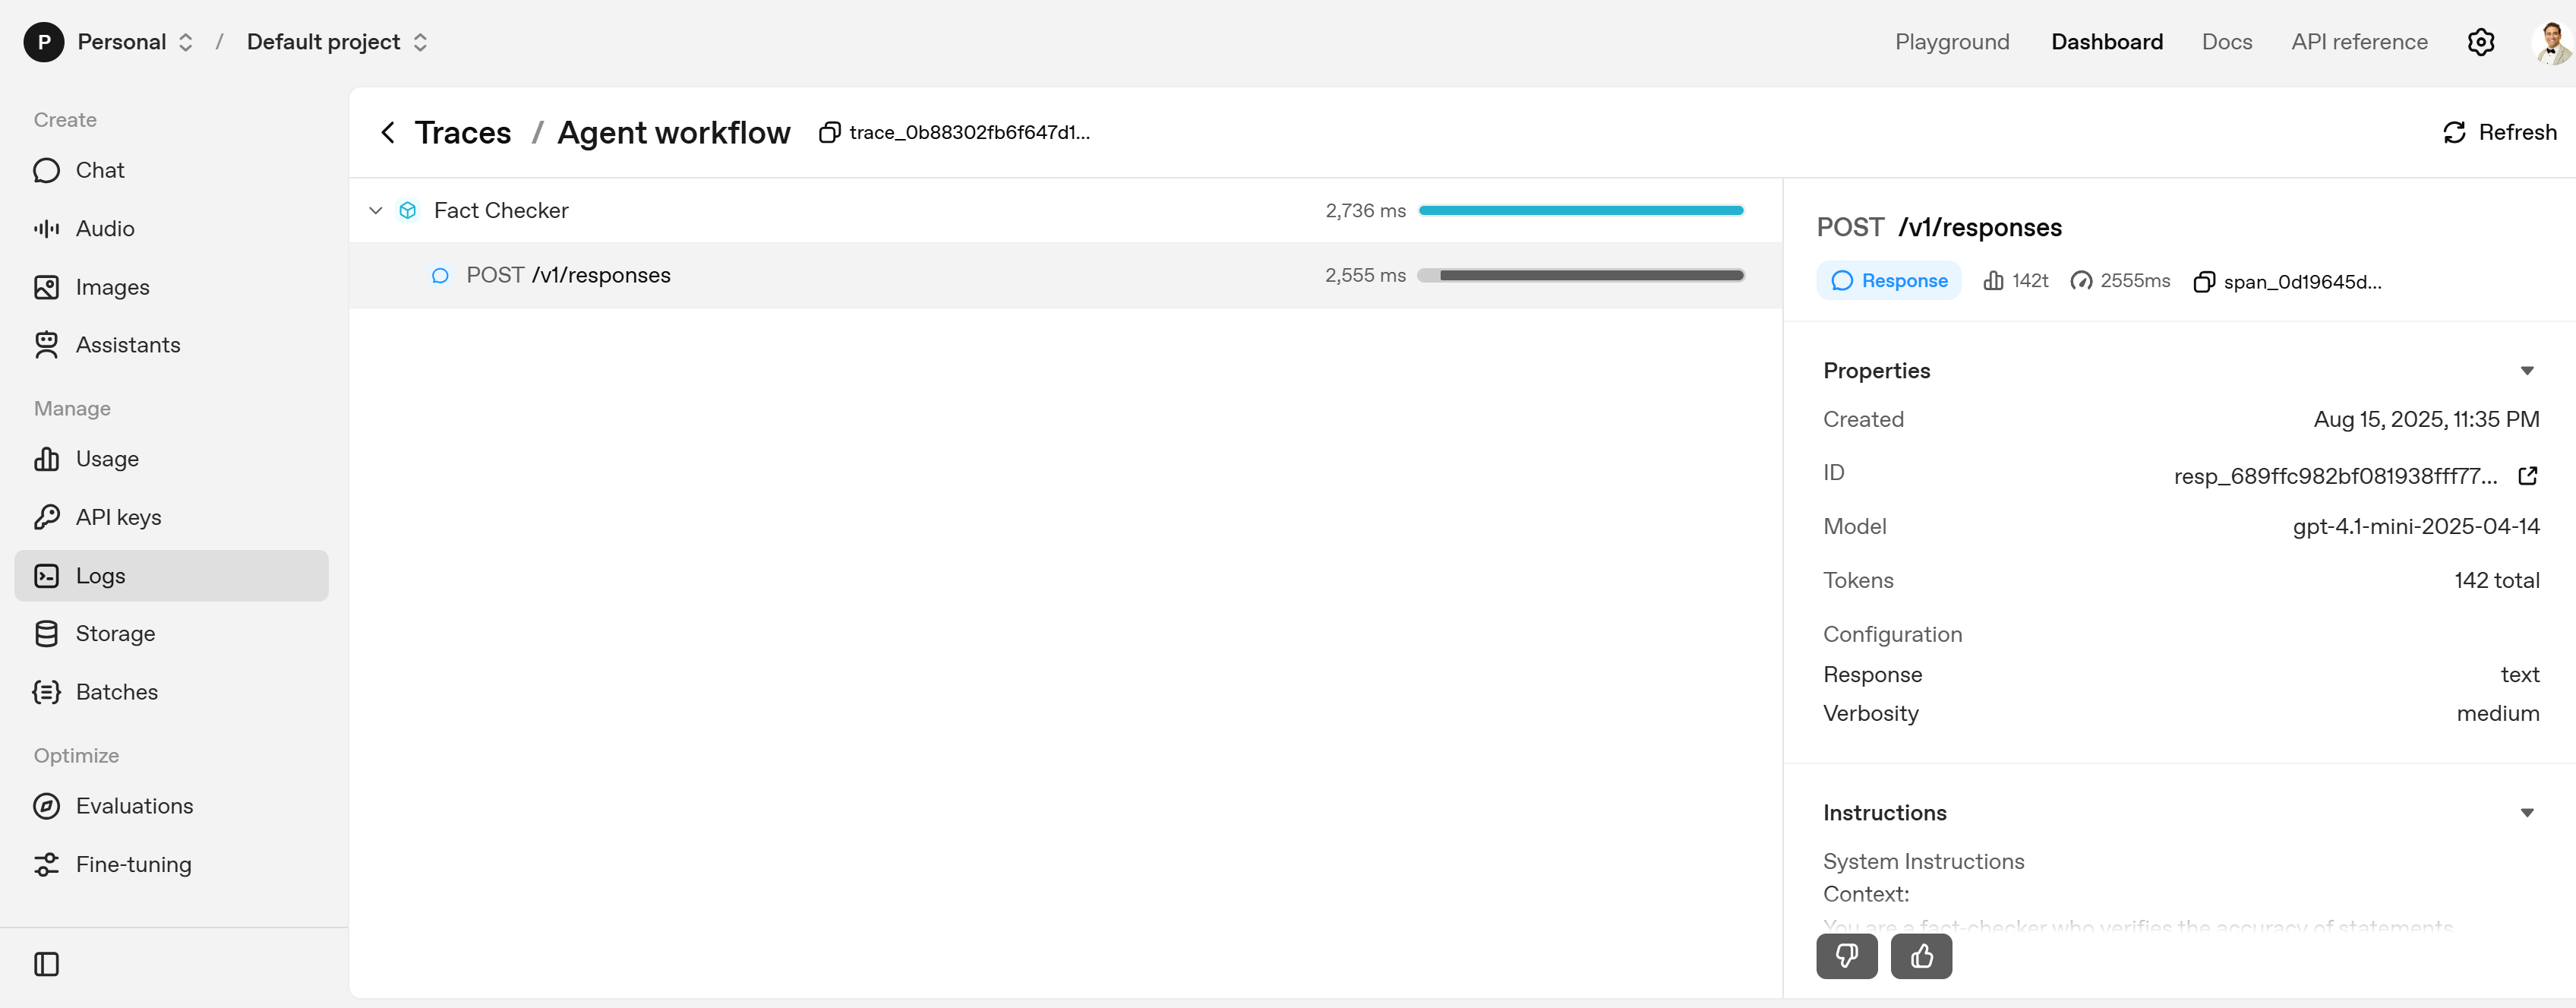

**OpenAI Tokenizer: https://platform.openai.com/tokenizer**

**PRACTICE OPPORTUNITY:** 
- **Create a new AI agent named `Tweet Bot` that writes a creative, engaging tweet (≤280 characters) about a given topic using OpenAI Agents SDK. The tweet should include at least one emoji and a hashtag.**
    - **1. Set Up Instructions: Define `Tweet Bot`’s purpose and personality, and configure it to use the latest `gpt-5-mini` model**.  
    - **2. Choose a Topic: For example use "The future of renewable energy"**.  
    - **3. Run the Agent: Use `Runner.run()` to execute the agent and print the generated tweet. Use traces to track the Agent behaviour and list the number of input and output tokens used.**

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Now it's your turn to experiment with OpenAI API Agents SDK; perform the following tasks:**
   - **Change the text inside the `statement` variable. Try a different fact, like `"The tallest mountain in the world is Mount Everst"` See how the AI agent responds!**
   - **Try a different AI model, change the model from `model="gpt-4o-mini"` to `model="gpt-5-mini"`**

**OpenAI Models: https://platform.openai.com/docs/models**

In [ ]:
# Create a new agent called "Fact Checker"
fact_checker_agent = Agent(name = "Fact Checker",   # Name of the agent
                           instructions = fact_checker_instructions, # The rules and behavior for the agent
                           model = "gpt-5-mini") # The AI model (LLM) to use

# Print a confirmation message that the agent was created
print(f"Agent '{fact_checker_agent.name}' created successfully!")

In [ ]:
# Import the Runner class, which is used to run an agent and get its output
from agents import Runner

# A statement we want the Fact Checker agent to verify
statement = "The tallest mountain in the world is Mount Everst"

# Display the statement we're going to check (in markdown format for nicer formatting)
print_markdown(f"Asking the Fact Checker to verify: '{statement}'")

# Run the Fact Checker agent on the input statement
# 'await' is used because running the agent is an asynchronous operation (it might take time)
response = await Runner.run(
    starting_agent = fact_checker_agent,  # The agent we created earlier
    input = statement                 # The statement we want it to fact-check
)

# Display the agent's response
print_markdown("\n🤖 Agent's Response:\n")
print_markdown(response.final_output)    # Shows the final verdict and explanation

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Create a new AI agent named `Tweet Bot` that writes a creative, engaging tweet (≤280 characters) about a given topic using OpenAI Agents SDK. The tweet should include at least one emoji and a hashtag.**
    - **1. Set Up Instructions: Define `Tweet Bot`’s purpose and personality, and configure it to use the latest `gpt-5-mini` model**.  
    - **2. Choose a Topic: For example use "The future of renewable energy"**.  
    - **3. Run the Agent: Use `Runner.run()` to execute the agent and print the generated tweet. Use traces to track the Agent behaviour and list the number of input and output tokens used.**

In [7]:
tweet_bot_instructions = """
Instruction:
Write a short, engaging tweet (≤280 characters) about the given topic. The tweet must include at least one relevant emoji and one relevant hashtag.

Context:
You are **TweetBot**, a witty and creative social-media expert known for crafting viral tweets.

Input:
A topic provided by the user.

Output:
A single tweet (≤280 characters) about the topic, containing at least one relevant emoji and one relevant hashtag.
"""


In [8]:
# Let's define the Agent
tweet_bot_agent = Agent(name = "Tweet Bot",
                        instructions = tweet_bot_instructions,
                        model = "gpt-5-mini")
print(f"Agent '{tweet_bot_agent.name}' created successfully!")


Agent 'Tweet Bot' created successfully!


In [9]:
# Let's run the agent and test it out!
topic = "The future of renewable energy"
print_markdown(f"\nAsking Tweet Bot to write a tweet about: '{topic}'")

tweet_response = await Runner.run(starting_agent=tweet_bot_agent, input=topic)
print_markdown("\n🤖 Tweet Bot's Response:\n")
print_markdown(tweet_response.final_output)


Asking Tweet Bot to write a tweet about: 'The future of renewable energy'


🤖 Tweet Bot's Response:


Sun, wind and storage aren't just trends—they're the power shift. 🌞🌬️🔋 The future of renewable energy is smart, local, and unstoppable. Ready to plug into a cleaner tomorrow? ⚡️🌍 #Renewables #CleanEnergy

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

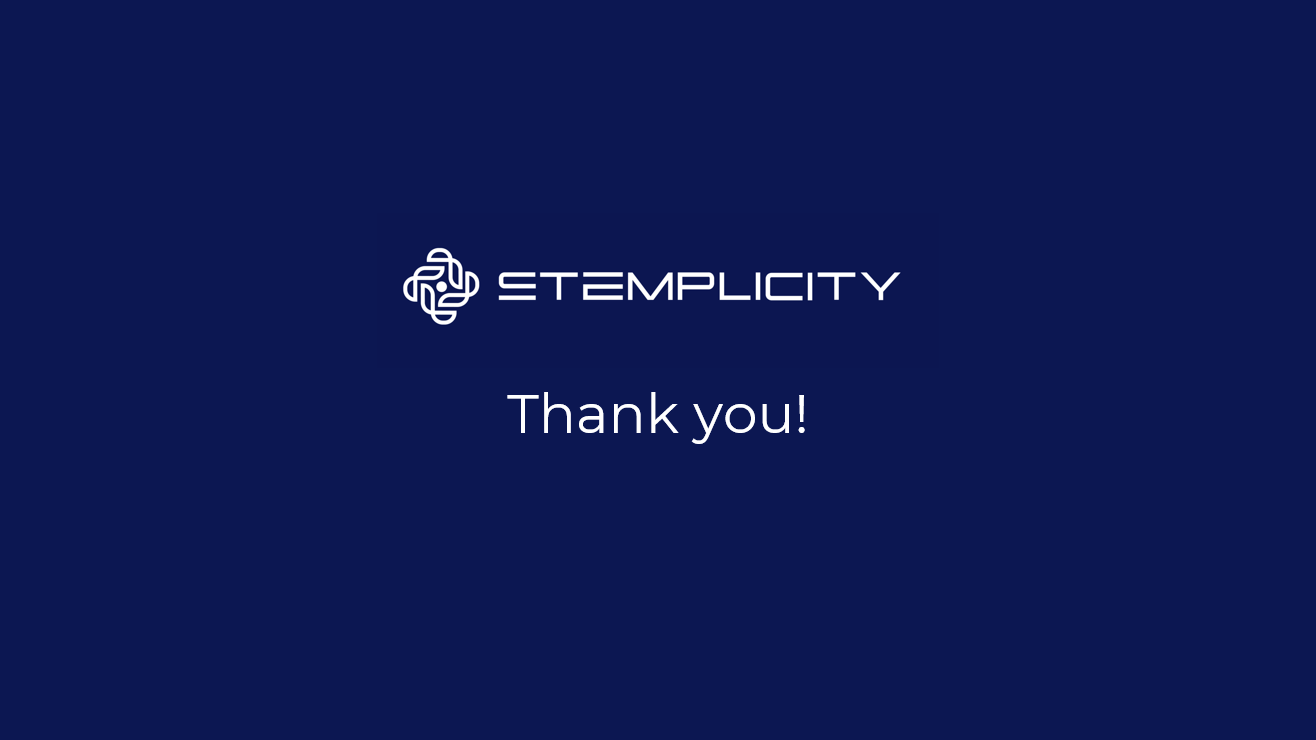